In [1]:
import sys
sys.path.append('../pyorderedfuzzy')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.initializers import Initializer
from keras.models import Model, Sequential
from keras.layers import Input, Lambda, Dense, Add, Concatenate, Minimum, Dropout, Maximum, Subtract, Average, LSTM
from keras import backend as K
import pickle

Using TensorFlow backend.


In [3]:
data = pickle.load(open('../data/train_1.pkl', 'rb'))
inputs = data[0]
targets = data[1]
targets = targets.reshape((-1,1))
inputs.shape, targets.shape

((9991, 100, 42), (9991, 1))

In [4]:
nsample = inputs[0]
lag = inputs.shape[1]
dim2 = inputs.shape[2]

In [26]:
#simple model
#model = Sequential()
#model.add(LSTM(dim2, activation='relu', input_shape=(lag, dim2)))
#model.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=lambda x:tuple([x[0],1])))
#model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 42)                14280     
_________________________________________________________________
lambda_7 (Lambda)            (None, 1)                 0         
Total params: 14,280
Trainable params: 14,280
Non-trainable params: 0
_________________________________________________________________


In [5]:
def fsplit(tensor):
    shape = list(tensor.shape)
    return [tensor[:,:,i:i+1] for i in range(shape[2])]

def fsplit_output_shape(input_shape):
    shape = list(input_shape)
    assert len(shape) == 3
    return [tuple([shape[0], shape[1], 1]) for _ in range(shape[2])]

class MyInit(Initializer):
    def __init__(self, weights):
        self.weights = weights
    def __call__(self, shape, dtype=None):
        return K.variable(self.weights, dtype=dtype)
    def get_config(self):
        return {'weights': self.weights}

In [6]:
x = Input(shape=(lag, dim2), dtype=K.floatx())
splits = Lambda(fsplit, output_shape=fsplit_output_shape)(x)
neurons = []
for i in range(dim2):
    neurons.append(LSTM(1)(splits[i]))
y = Average()(neurons)

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model = Model(inputs=x, outputs=y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 42)      0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               [(None, 100, 1), (No 0           input_1[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 1)            12          lambda_1[0][0]                   
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 1)            12          lambda_1[0][1]                   
__________________________________________________________________________________________________
lstm_3 (LS

In [8]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
model.fit(inputs, targets, epochs=100, verbose=1, validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 8991 samples, validate on 1000 samples
Epoch 1/100
 864/8991 [=>............................] - ETA: 36:55 - loss: 39.2106 - mean_absolute_error: 4.9868

In [7]:
trains = np.array(trains)
targets = np.array(targets)
trains.shape, targets.shape

((9991, 100, 42), (9991,))

In [8]:
pickle.dump([trains, targets], open('../data/train_2.pkl', 'wb'))

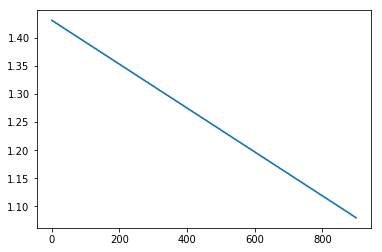

In [10]:
fig, ax = plt.subplots()
ax.plot(range(len(targets)), targets)
plt.show()

In [19]:
trains.shape

(901, 100, 22)

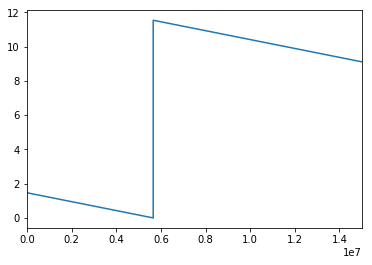

In [8]:
df_train['time_to_failure'].plot()
plt.show()

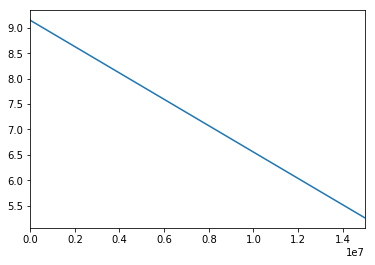

In [14]:
df_train['time_to_failure'].plot()
plt.show()

In [1]:
from scipy import signal
from scipy import stats

In [7]:
data = df_train.values[:15000,0]

In [9]:
analytic_signal = signal.hilbert(data)
amplitude_envelope = np.abs(analytic_signal)
slope, intercept, r_value, p_value, std_err = stats.linregress(range(len(amplitude_envelope)), amplitude_envelope)

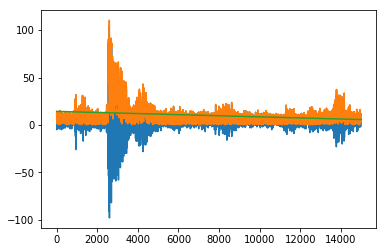

In [14]:
fig, ax = plt.subplots()
ax.plot(range(len(data)), data)
ax.plot(range(len(data)), amplitude_envelope)
ax.plot(range(len(data)), slope*np.arange(len(data))+intercept)